In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
# Reading dataset
df = pd.read_csv("employee_data.csv")
# describe the dataset before cleaning
print("before cleaning")
print(df.describe())
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['salary'].median()
df['salary'].fillna(median, inplace=True)
median = df['age'].median()
df['age'].fillna(median, inplace=True)
# after cleaning
print("after cleaning")
print(df.describe())
# reset the index after data cleaning 
# because one-hot encoding maps values by index
df.reset_index(inplace=True, drop=True)

before cleaning
               age      salary
count  1000.000000  1000.00000
mean     41.155000  2227.46100
std      13.462995  1080.20976
min      18.000000   553.00000
25%      30.000000  1360.00000
50%      41.000000  2174.00000
75%      53.000000  2993.75000
max      64.000000  5550.00000
after cleaning
              age       salary
count  910.000000   910.000000
mean    41.031868  2238.196703
std     13.419772  1091.406193
min     18.000000   553.000000
25%     30.000000  1360.000000
50%     41.000000  2179.000000
75%     53.000000  2996.000000
max     64.000000  5550.000000


In [53]:
# adding a new column for age ranges
q_1 = df['age'].quantile(q=0.25) # 30
q_3 = df['age'].quantile(q=0.75) # 53
q_4 = df['age'].max() # 64
df['age_ranges'] = pd.cut(x=df['age'], bins=[0, q_1, q_3, q_4], labels=['young', 'adult', 'old'])
print(df.info())
print(df.groupby(['age_ranges']).mean())
print(df.groupby(['gender']).mean())
print(df.groupby(['education']).mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gender      910 non-null    object  
 1   age         910 non-null    int64   
 2   education   910 non-null    object  
 3   salary      910 non-null    int64   
 4   age_ranges  910 non-null    category
dtypes: category(1), int64(2), object(2)
memory usage: 29.6+ KB
None
                  age       salary
age_ranges                        
young       24.177419  2316.963710
adult       41.930958  2258.977728
old         58.760563  2102.680751
              age       salary
gender                        
female  40.929515  2250.757709
male    41.133772  2225.690789
                      age       salary
education                             
Assistant Prof  42.578512  2301.305785
Associate Prof  59.365079  2064.513228
Bacholar        21.021978  2351.208791
Master          29.376682  2292.802691


In [54]:
# since the number of categories in education column is large
# we will apply label encoding 

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['education'])
print(integer_encoded)

df["education"].replace(to_replace=df["education"].tolist(), value=integer_encoded, inplace = True)
df.head()

[4 1 1 3 3 0 5 0 5 3 5 0 0 5 5 1 3 0 5 3 1 3 1 1 5 1 1 4 1 2 1 5 1 6 3 1 5
 2 4 1 5 1 1 0 0 0 3 0 0 5 3 3 3 6 1 0 1 5 2 0 1 1 2 4 0 0 3 0 2 3 1 3 2 5
 3 3 1 2 1 5 3 2 1 5 4 1 5 3 1 1 1 3 3 3 5 0 3 3 1 2 0 1 4 4 1 5 1 5 3 5 3
 5 0 0 5 5 3 3 2 5 4 3 3 3 1 0 1 4 6 1 2 1 1 0 2 2 0 5 0 3 0 3 4 1 3 3 5 4
 0 5 1 1 5 5 3 2 5 0 3 3 5 3 3 4 3 1 4 5 1 1 5 3 1 2 4 2 3 0 5 4 3 5 1 3 4
 2 2 5 3 3 0 0 4 3 1 6 5 5 6 0 5 4 1 3 2 1 2 4 4 2 2 5 3 1 6 5 4 4 5 1 2 0
 5 3 3 5 0 1 5 3 1 1 2 1 5 0 5 1 0 5 3 1 1 1 3 1 1 1 4 3 3 1 3 0 5 1 0 1 2
 3 3 5 1 1 4 5 1 0 3 5 0 5 5 5 5 4 0 1 3 2 3 0 2 4 0 4 5 5 0 3 0 2 2 4 5 5
 4 3 4 5 2 0 1 0 2 3 2 1 1 2 5 1 3 2 5 4 1 1 1 1 2 1 5 1 1 3 0 5 4 1 3 0 5
 3 1 1 3 5 4 1 1 5 1 3 3 5 1 3 3 1 0 3 5 1 2 3 1 5 2 5 1 5 0 3 5 1 0 3 3 2
 1 3 5 5 1 1 1 0 5 6 1 4 1 5 6 2 3 0 3 2 3 3 0 0 4 5 3 1 2 1 5 3 1 5 1 3 0
 3 3 5 2 2 5 6 3 0 3 5 1 1 5 3 1 0 1 4 5 1 5 3 1 3 5 3 3 6 1 1 3 1 2 3 4 2
 5 3 4 5 4 2 1 4 6 5 1 5 2 5 2 0 3 2 3 1 4 3 3 5 0 1 1 3 5 4 1 4 0 2 3 0 5
 5 0 1 3 2 2 5 3 2 3 3 0 

,gender,age,education,salary,age_ranges
0,male,36,4,2297,adult
1,male,55,1,1134,old
2,male,61,1,4969,old
3,female,29,3,902,young
4,female,34,3,3574,adult


In [55]:
# then we will apply one-hot encoding on gender column
gender_encoded = label_encoder.fit_transform(df['gender'])
gender_reshaped = gender_encoded.reshape(len(gender_encoded), 1)

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first', categories='auto')
gender_onehot_encoded = onehot_encoder.fit_transform(gender_reshaped)

gender_ohe_df = pd.DataFrame(gender_onehot_encoded)
df = df.join(gender_ohe_df)
df = df.rename({0: "male"}, axis=1)
df.drop(columns=['gender'], inplace=True)
print(df)

     age  education  salary age_ranges  male
0     36          4    2297      adult   1.0
1     55          1    1134        old   1.0
2     61          1    4969        old   1.0
3     29          3     902      young   0.0
4     34          3    3574      adult   0.0
..   ...        ...     ...        ...   ...
905   52          5    1833      adult   1.0
906   21          2     667      young   0.0
907   49          5    4158      adult   0.0
908   56          1    2414        old   1.0
909   64          1     788        old   0.0

[910 rows x 5 columns]


In [56]:
# then we apply ordinal encoding on the age_ranges column 
age_ranges_dict = {'young': 1, 'adult': 2, 'old': 3}
# setting the new column as int64 to make show in the heatmap below
df['age_ordinal'] = df.age_ranges.map(age_ranges_dict).astype('int64')
df.drop(columns=['age_ranges'], inplace=True)
print(df)

     age  education  salary  male  age_ordinal
0     36          4    2297   1.0            2
1     55          1    1134   1.0            3
2     61          1    4969   1.0            3
3     29          3     902   0.0            1
4     34          3    3574   0.0            2
..   ...        ...     ...   ...          ...
905   52          5    1833   1.0            2
906   21          2     667   0.0            1
907   49          5    4158   0.0            2
908   56          1    2414   1.0            3
909   64          1     788   0.0            3

[910 rows x 5 columns]


                  age  education    salary      male  age_ordinal
age          1.000000  -0.199976 -0.072418  0.007614     0.917188
education   -0.199976   1.000000  0.017273 -0.044472    -0.278569
salary      -0.072418   0.017273  1.000000 -0.011490    -0.068605
male         0.007614  -0.044472 -0.011490  1.000000     0.023312
age_ordinal  0.917188  -0.278569 -0.068605  0.023312     1.000000


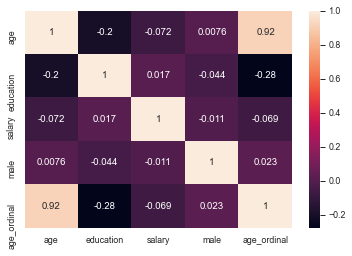

In [57]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [63]:
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["salary"], df["age_ordinal"])[0, 1]
print("Correlation between salary and age_ordinal:", round(corr_coef, 2))

# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["salary"], df["age_ordinal"])
print("Independent t-test 0:", ttest, pval)

Correlation between salary and age_ordinal: -0.07
Independent t-test 0: 61.808992226907485 0.0


Text(0.5, 1.0, 'Independent T-Test')

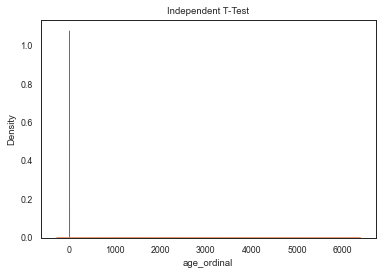

In [64]:
sns.kdeplot(df["age_ordinal"], shade=True)
sns.kdeplot(df["salary"], shade=True)
plt.title("Independent T-Test")

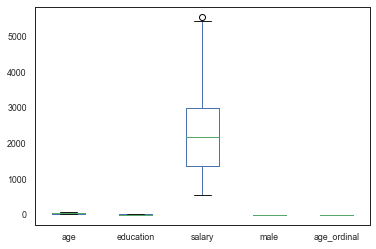

In [65]:
#Boxplot graph of all columns
df.plot(kind='box')
plt.show()

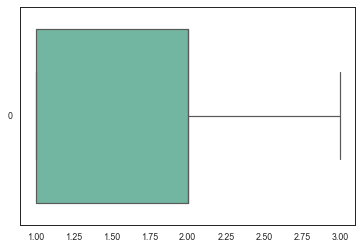

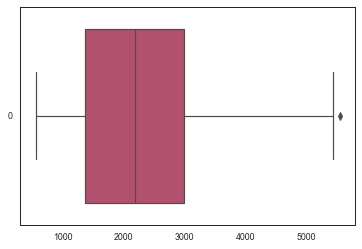

In [67]:
#Distribution of data in each class
cals_ord = df["age_ordinal"]
durs = df["salary"]

ax = sns.boxplot(data=cals_ord, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=durs, orient="h", palette="flare")
plt.show()

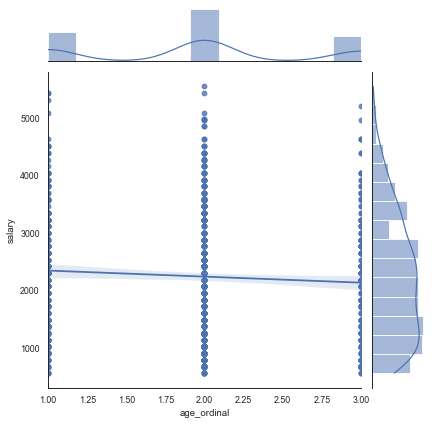

In [69]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="age_ordinal", y="salary", data=df)
plt.show()